In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [19]:
# Load the dataset
file_path = "/content/twitter_training.csv"  # Replace with the actual file path
data = pd.read_csv(file_path, header=None, encoding='utf-8')

# Rename columns for clarity
data.columns = ['ID', 'Topic', 'Sentiment', 'Text']

# Drop rows with missing text values and duplicates
data = data.dropna(subset=['Text']).drop_duplicates()


In [20]:
sentiment_counts = data['Sentiment'].value_counts()

<ipython-input-21-cf343d201b06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


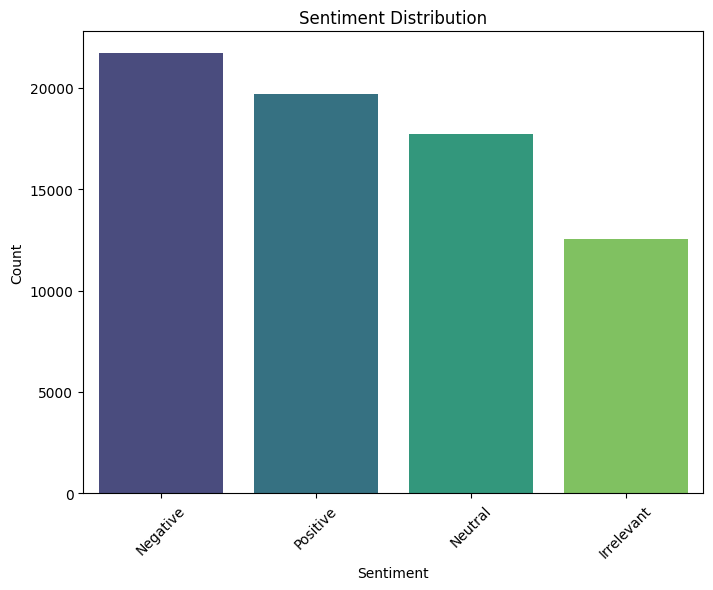

In [21]:
# Plot sentiment distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

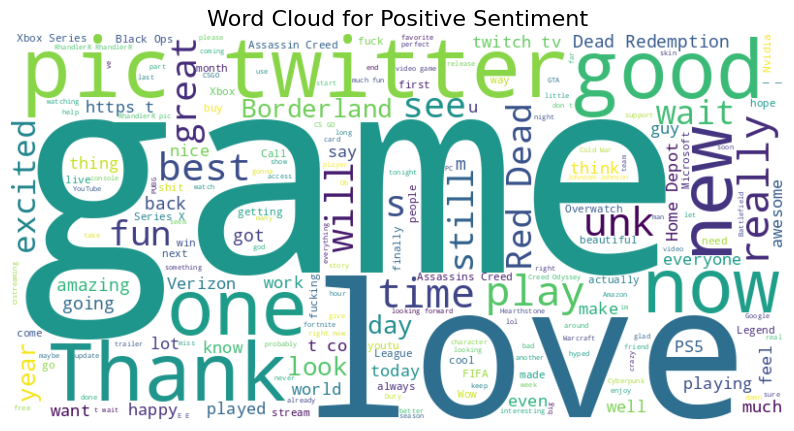

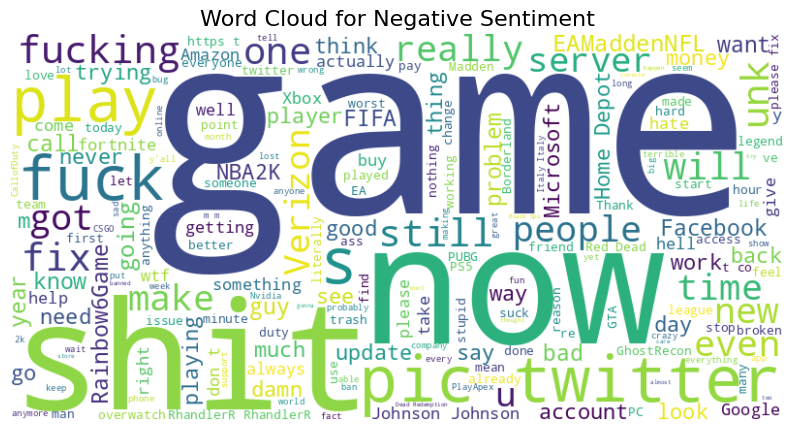

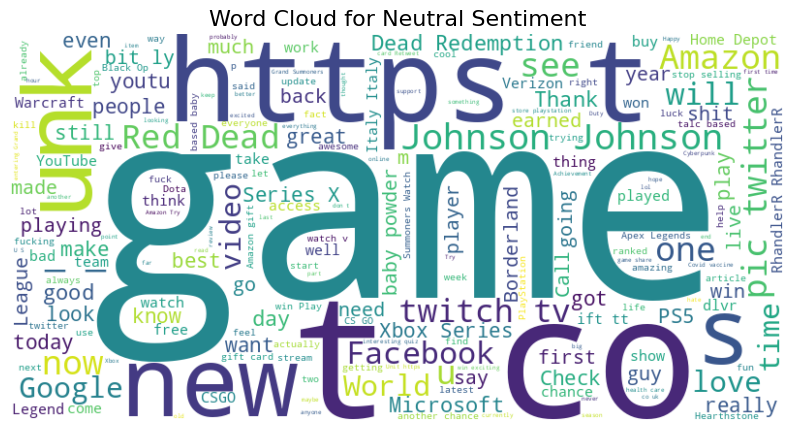

In [22]:
def plot_word_cloud(sentiment, data):
    text = ' '.join(data[data['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment', fontsize=16)
    plt.axis('off')
    plt.show()

for sentiment in ['Positive', 'Negative', 'Neutral']:
    plot_word_cloud(sentiment, data)

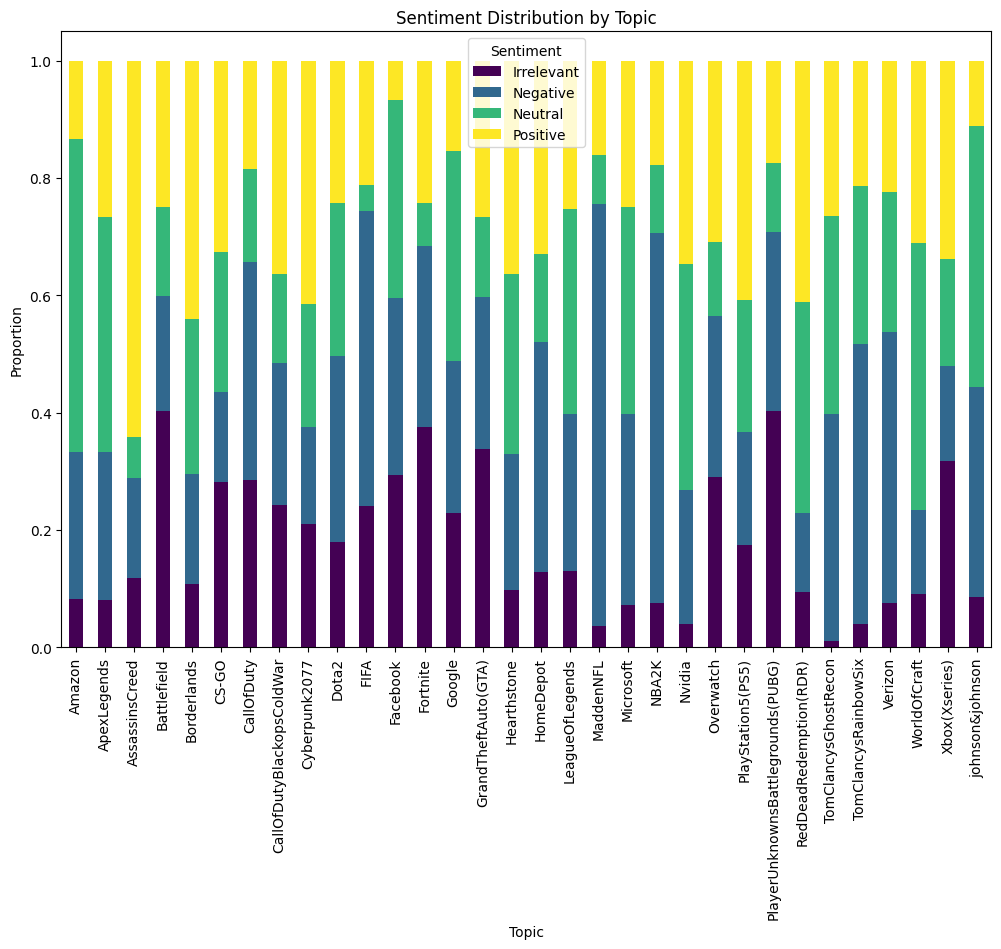

In [23]:
# Sentiment patterns by topic
topic_sentiments = data.groupby('Topic')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

# Plot sentiment patterns by topic
topic_sentiments.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sentiment Distribution by Topic')
plt.xlabel('Topic')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.show()